In [1]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
import numpy as np
import sys
import matplotlib.pyplot as plt 
from scipy.fftpack import fft, ifft
from scipy import signal
abspath = '/home/shubham1/spartan_mount'
# abspath = '/data/cephfs/punim0895'
sys.path.append(abspath + '/hwu1/slicedatareadWriteHipstar/jupyter_codes')
# from deriv import *
# from lib_msh import *
import scipy.io as sio

In [2]:
path = abspath + '/hwu1/slicedatareadWriteHipstar/cd_airfoil_inputData_allMach/'
import pywt
M = 0.2
DATAF2 = np.load(path+'M0'+str(int(M*10))+'_spod_data/flowdata_b2_M0'+str(int(M*10))+'.npz')
DATAG2 = np.load(path+'M0'+str(int(M*10))+'_spod_data/griddata_b2_M0'+str(int(M*10))+'.npz')

In [3]:
data = DATAF2['p1']
x = DATAG2['x1']
y = DATAG2['y1']

In [6]:
from scipy.interpolate import interp1d
Nt = data.shape[-1]
# St = data[270:,0,0].shape[0]
dt=0.003
indexx=470
tf = np.linspace(0, 1.0/(2.0*dt), Nt//2)
# Sf = np.linspace(0, 1.0/(2.0*dx), St//2)
dx = np.min(np.abs(x[270:,0]-x[269:-1,0]))
St = int((x[-1,0]-x[indexx,0])//dx)
# print St
Sf = np.linspace(0, 1.0/(2.0*dx), St//2)
SS = np.linspace(0,(St-1)*dx,St)
# print SS.shape
data_mod = np.zeros((Nt,St))
# print np.min(data[270:,0]-data[270,0])
for nt in range(Nt):
    data_mod[nt,:] = interp1d(x[indexx:,0]-x[indexx,0],data[indexx:,0,nt])(SS)
    

data_mod.shape

(2999, 889)

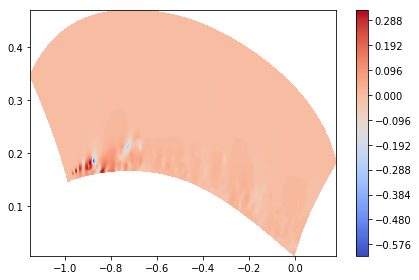

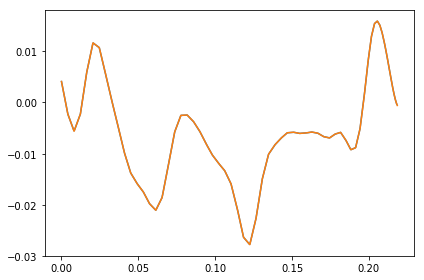

In [5]:

fig = plt.figure()    
levels=None
plt.contourf(x[270:,:],y[270:,:],data[270:,:,1],256,levels=levels,cmap='coolwarm')
# plt.contourf(x3,y3,Z3,256,levels=levels,cmap='coolwarm')


plt.colorbar(orientation='vertical')
plt.tight_layout()
plt.show()

fig = plt.figure()    
plt.plot(SS,(data_mod[100,:]), label='interp')
# indexx=300
plt.plot(x[indexx:,0]-x[indexx,0],data[indexx:,0,100],label='orig')

plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


<IPython.core.display.Javascript object>


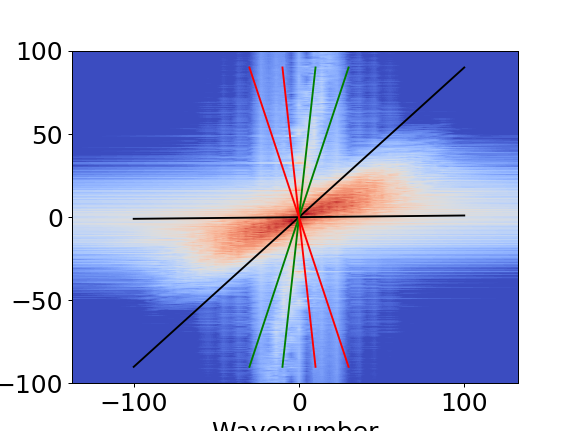

In [7]:
%matplotlib notebook

FS = np.fft.fft2(np.flip(np.transpose(data_mod),axis=-1))

# tf = np.linspace(0, 1.0/(1.0*dt), Nt)
# Sf = np.linspace(0, 1.0/(1.0*dx), St)
tf = np.fft.fftshift(np.fft.fftfreq(Nt,dt))
Sf = np.fft.fftshift(np.fft.fftfreq(St,dx))
WPS=4*np.abs(FS)/(Nt*St)
WPS1 = np.fft.fftshift(WPS)

Xtemp = tf[:]    # w
Ytemp = Sf[:]    # k
X, Y = np.meshgrid(Xtemp, Ytemp)
UC  = X/Y
Z = WPS1[:,:]
fig = plt.figure()    
plt.rcParams['font.size']=20
levels=None
ind1 = St//2-30    # St- No. of points
ind2 = St//2+30
levels=np.linspace(-60, -22,100)
plt.contourf(Y[ind1:ind2,:],X[ind1:ind2,:],10*np.log10(Z[ind1:ind2,:]),256,levels=levels,cmap='coolwarm',extend='both')
# plt.colorbar(orientation='vertical')
plt.plot([100,-100],[90,-90],'k')
plt.plot([100,-100],[1,-1],'k')

plt.plot([30,-30],[90,-90],'g')
plt.plot([10,-10],[90,-90],'g')

plt.plot([-30,30],[90,-90],'r')
plt.plot([-10,10],[90,-90],'r')
plt.ylim([-100,100])
plt.xlabel('Wavenumber')
plt.ylabel('Frequency')
plt.show()
plt.savefig('wave-freq_M02.png',dpi=300,bbox_inches="tight")


In [10]:
St

889

In [17]:
X.shape

(88, 2999)

In [18]:
Y.shape

(88, 2999)

In [19]:
St


88